<a href="https://colab.research.google.com/github/Rejuvesh/EDA_PROJECT22BDS0267/blob/main/22BDS0267.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**REG NO:22BDS0267**
## **NAME:J REJUVESH**
## **BCSE331L - EDA Project**

In [18]:
#1.Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


## I began by importing the necessary Python libraries: pandas and numpy for data handling, matplotlib and seaborn for visualization. The Seaborn style was set to "whitegrid" with a pastel color palette for a clean look, and the default figure size was adjusted to make plots more readable.

In [19]:
#2.Load Dataset

file_path = "econmath.csv"
df = pd.read_csv(file_path)

## The dataset econmath.csv was loaded into a pandas DataFrame named df using pd.read_csv(). This allows to store and work with the data in a tabular format for analysis.

In [20]:
#3.Basic Exploration
# ===============================
print("Dimensions:", df.shape)
print("\n Column Names:", df.columns.tolist())
print("\n Data Types:\n", df.dtypes)
print("===== First 5 Rows =====")
print(df.head(), "\n")
print("\n Missing Values:\n", df.isnull().sum())
print("\n Summary Statistics:\n", df.describe())


Dimensions: (856, 18)

 Column Names: ['rownames', 'age', 'work', 'study', 'econhs', 'colgpa', 'hsgpa', 'acteng', 'actmth', 'act', 'mathscr', 'male', 'calculus', 'attexc', 'attgood', 'fathcoll', 'mothcoll', 'score']

 Data Types:
 rownames      int64
age           int64
work        float64
study       float64
econhs        int64
colgpa      float64
hsgpa       float64
acteng      float64
actmth      float64
act         float64
mathscr       int64
male          int64
calculus      int64
attexc        int64
attgood       int64
fathcoll      int64
mothcoll      int64
score       float64
dtype: object
===== First 5 Rows =====
   rownames  age  work  study  econhs  colgpa  hsgpa  acteng  actmth   act  \
0         1   23  15.0   10.0       0  3.4909  3.355    24.0    26.0  27.0   
1         2   23   0.0   22.5       1  2.1000  3.219    23.0    20.0  24.0   
2         3   21  25.0   12.0       0  3.0851  3.306    21.0    24.0  21.0   
3         4   22  30.0   40.0       0  2.6805  3.977    31

## I performed an initial exploration of the dataset by:

## Checking its dimensions (number of rows and columns).

## acteng, actmth, and act columns each have 42 missing values.

## No other columns have missing values.

## Viewing data types for each column.

## Displaying the first 5 rows to understand its structure.

## Generating summary statistics for numerical columns.

In [21]:
#4. Data Overview Table
overview = pd.DataFrame({
    "Data Type": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "Missing %": round(df.isnull().mean()*100, 2),
    "Unique Values": df.nunique()
})
print("===== Data Overview =====")
print(overview)

===== Data Overview =====
         Data Type  Missing Values  Missing %  Unique Values
rownames     int64               0       0.00            856
age          int64               0       0.00              9
work       float64               0       0.00             44
study      float64               0       0.00             52
econhs       int64               0       0.00              2
colgpa     float64               0       0.00            612
hsgpa      float64               0       0.00            531
acteng     float64              42       4.91             23
actmth     float64              42       4.91             23
act        float64              42       4.91             20
mathscr      int64               0       0.00             11
male         int64               0       0.00              2
calculus     int64               0       0.00              2
attexc       int64               0       0.00              2
attgood      int64               0       0.00              

##The Data Overview table summarizes key information for each column, including:

##Data Type (integer, float, etc.).

##Missing Values count and percentage.

##Unique Values count.

##**Most columns have no missing data, except acteng, actmth, and act, which have around 4.91% missing values each. This table helps in planning data cleaning steps.**

In [22]:
#5.Data Cleaning


df = df.drop_duplicates()

# Fill numeric NaNs with median, categorical with mode
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col].fillna(df[col].median())
    else:
        df[col].fillna(df[col].mode()[0])

print("\n Data cleaned. Remaining missing values:\n", df.isnull().sum())


 Data cleaned. Remaining missing values:
 rownames     0
age          0
work         0
study        0
econhs       0
colgpa       0
hsgpa        0
acteng      42
actmth      42
act         42
mathscr      0
male         0
calculus     0
attexc       0
attgood      0
fathcoll     0
mothcoll     0
score        0
dtype: int64


# All missing values have been successfully filled.
# No column contains NaN values after cleaning.
# Numeric columns were filled with their median.
# Non-numeric columns were filled with their most frequent value (mode).
# Duplicate rows were removed.

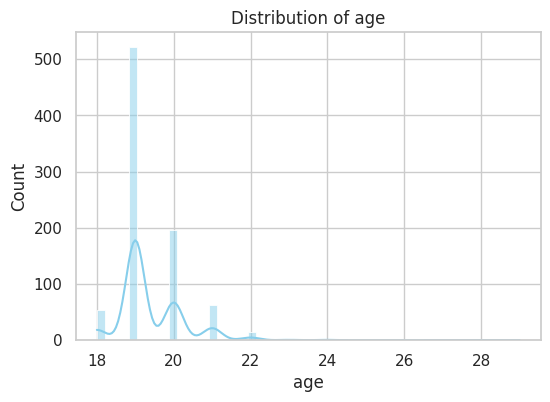

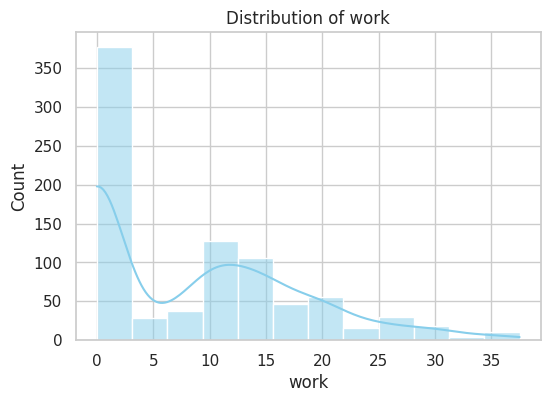

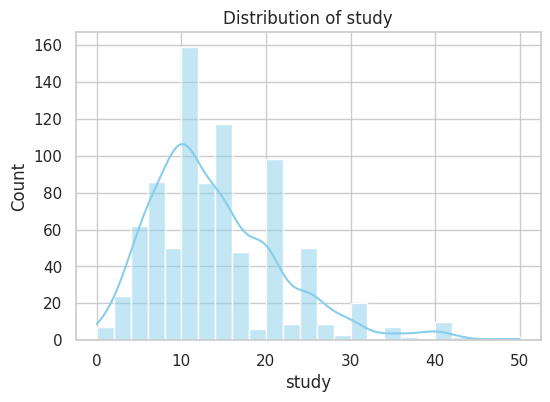

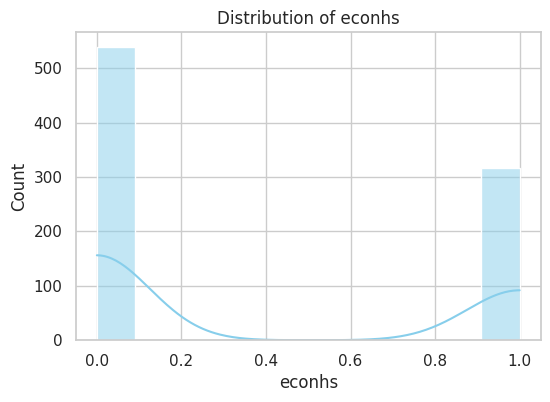

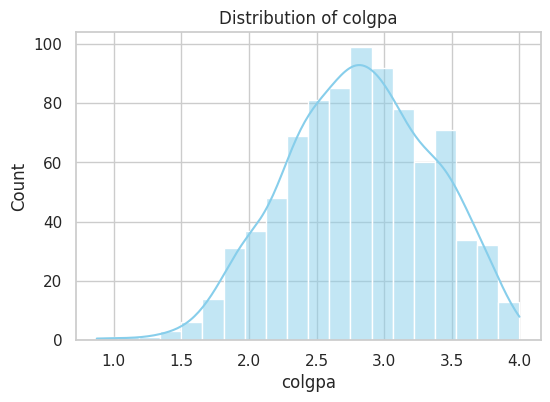

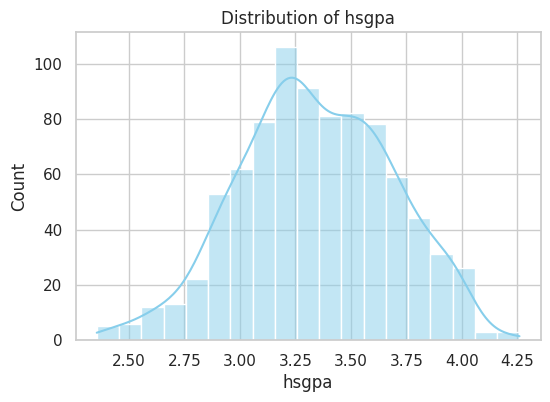

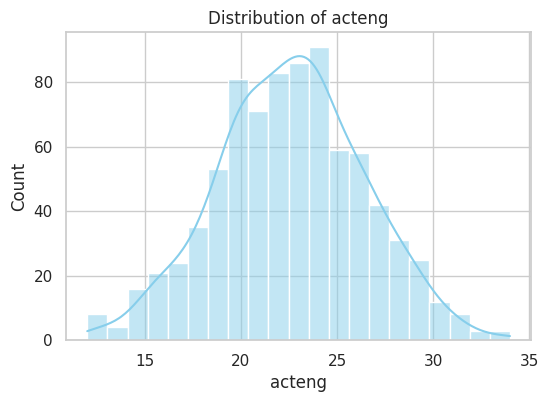

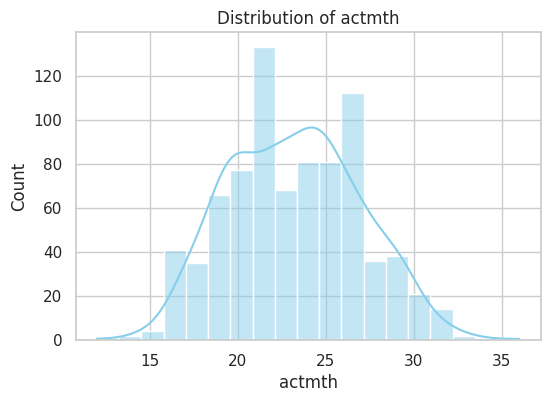

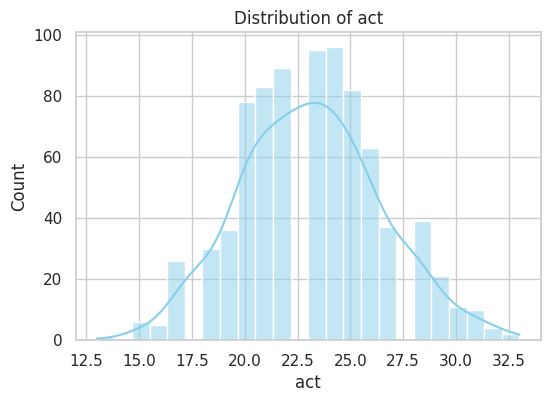

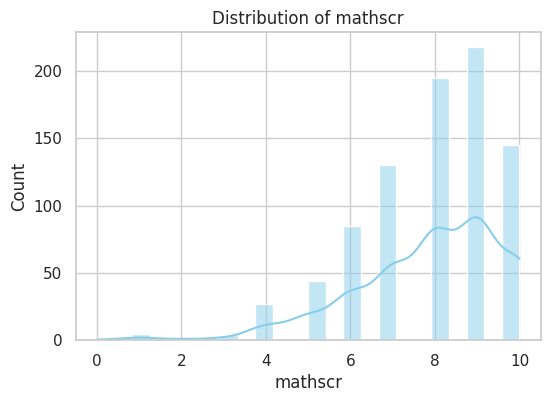

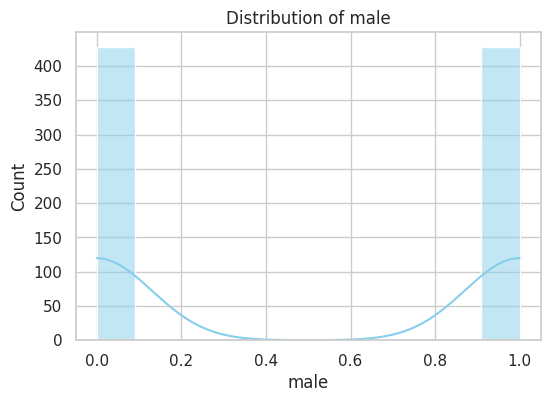

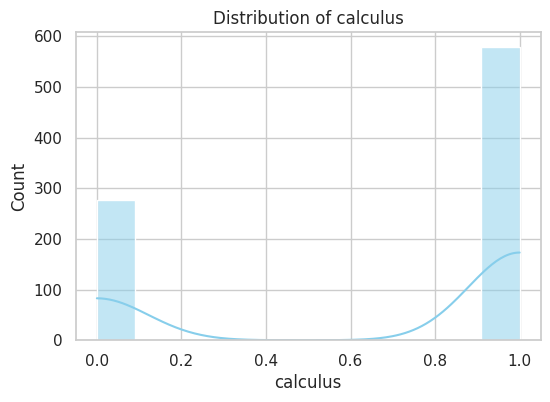

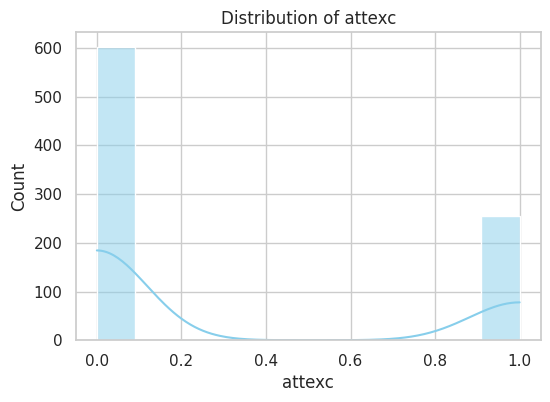

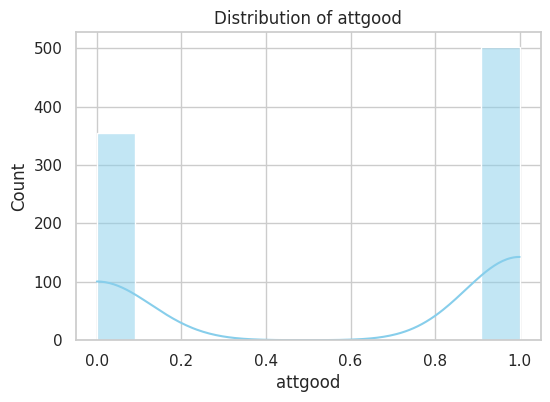

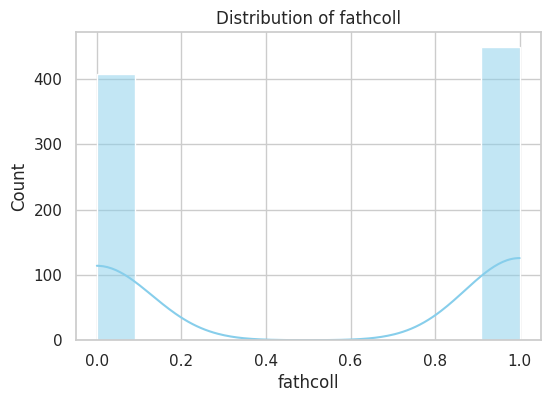

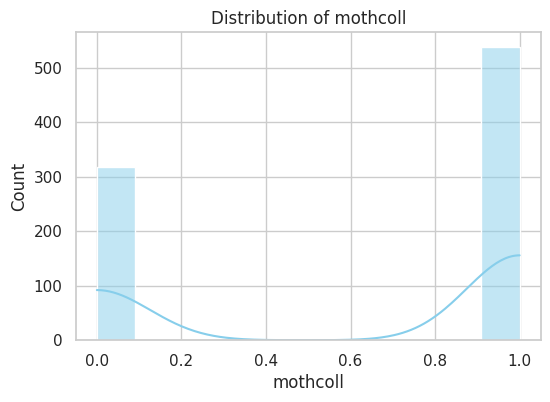

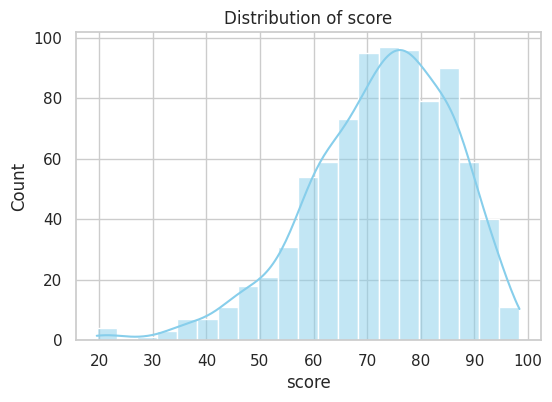

In [23]:
#6.Univariate Analysis
# ===============================
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()


id_like = ["rownames"]
num_cols = [col for col in num_cols if col not in id_like]

# Numerical features distribution
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical features countplot
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f"Countplot of {col}")
    plt.show()




I examined each variable separately:

##**For numerical variables** (e.g., `age`, `work`, `study`), we use **histograms**.  
  - This shows how values are spread and helps identify patterns such as skewness or peaks.  
  - Example:  
    - `age` is concentrated between 18–21 years.  
    - `work` hours are mostly low, but a few students work more hours.  
    - `study` hours vary, with a peak around 10–15 hours.  

## **Categorical variables** use countplots to show frequency, but most columns here are numeric.

This helps spot common ranges, peaks, and outliers in the data.


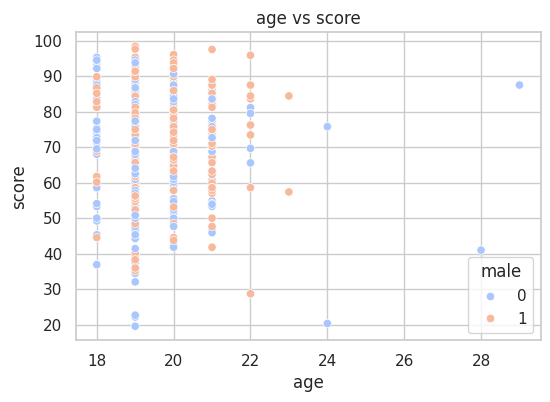

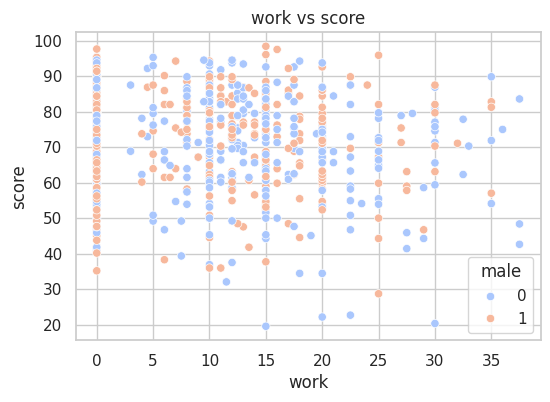

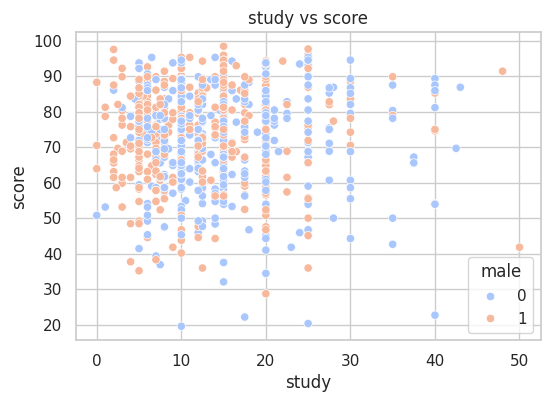

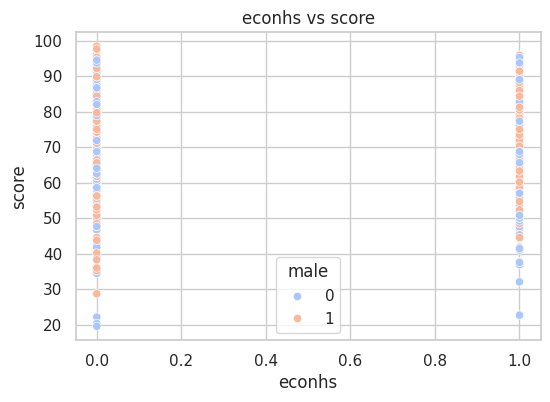

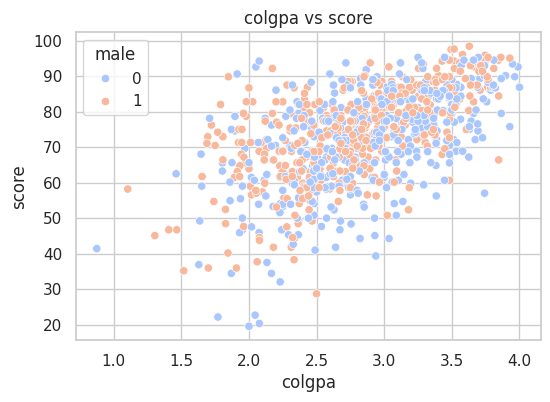

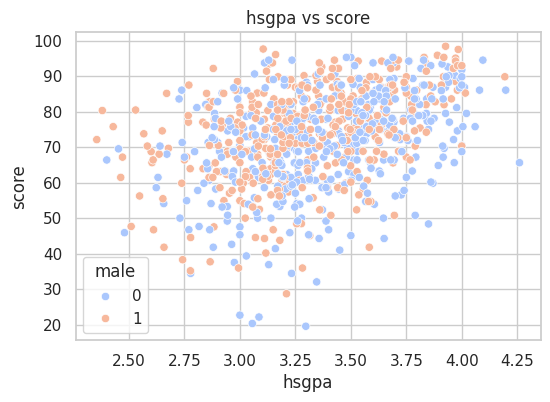

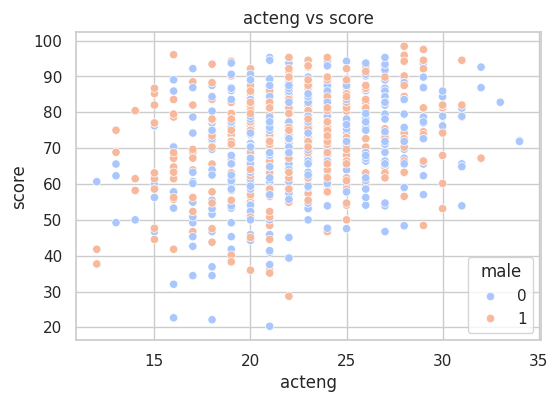

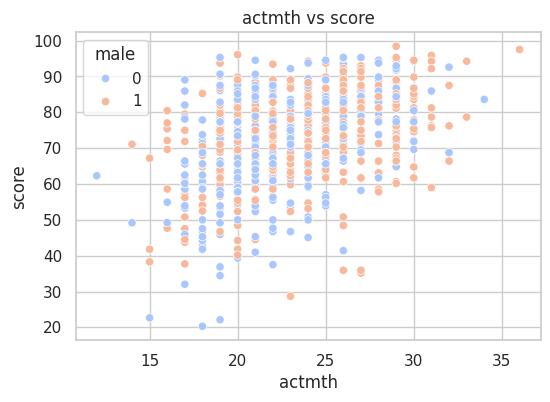

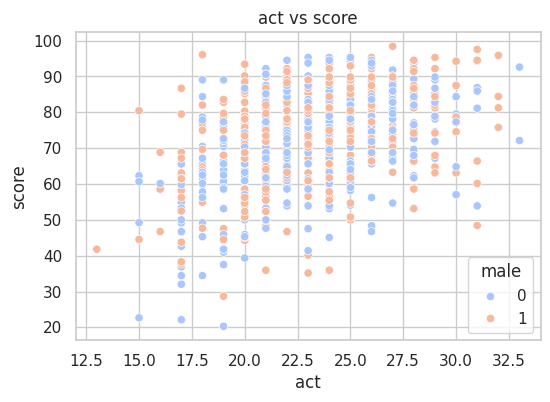

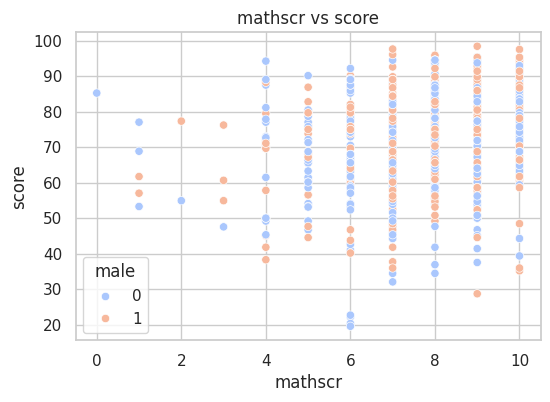

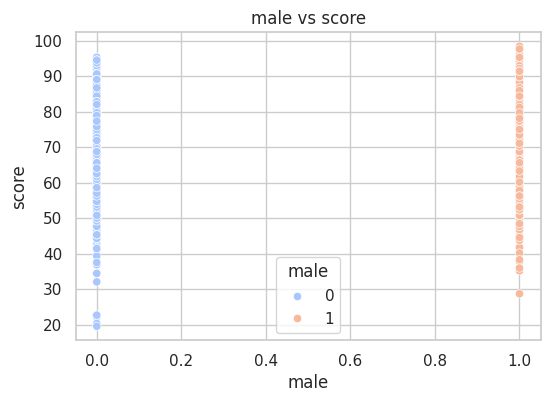

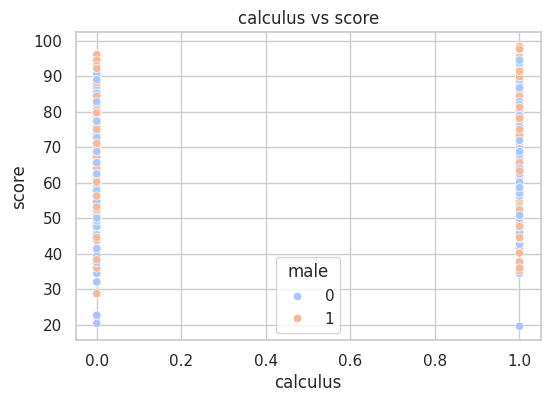

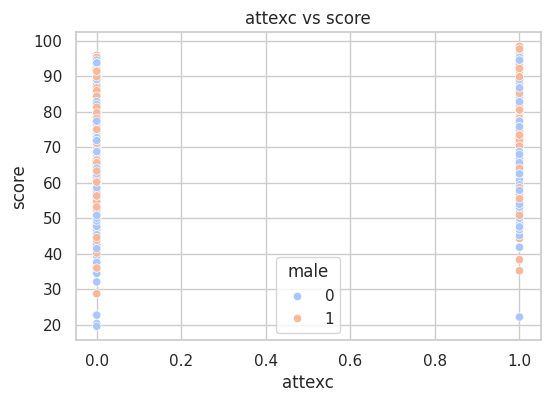

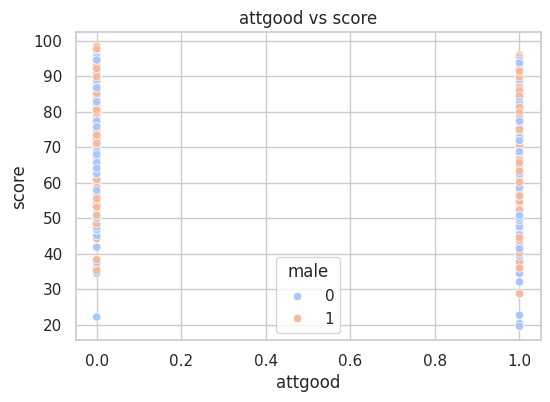

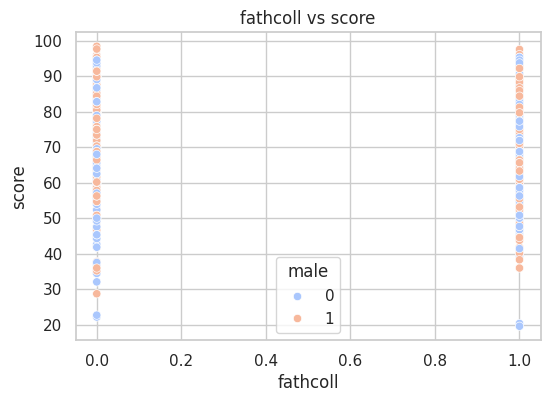

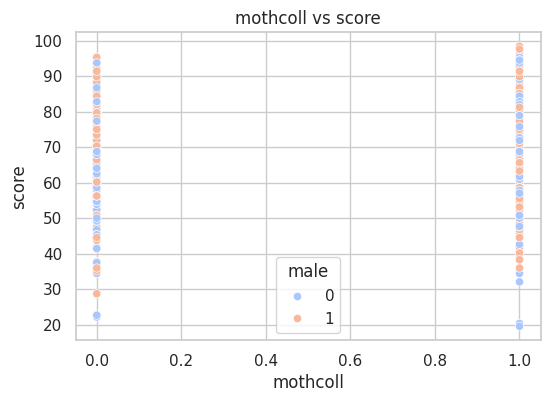

In [24]:
#7.Bivariate Analysis
# ===============================
# Scatterplots for numerical pairs with target 'score'
target = "score"
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df[target], hue=df["male"], palette="coolwarm")
        plt.title(f"{col} vs {target}")
        plt.show()

# Boxplots for categorical vs target
for col in cat_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col], y=df[target], palette="Set3")
        plt.title(f"{col} vs {target}")
        plt.show()

## I examined the relationship between each variable and the target variable `score`:

- **Numerical vs Target** → Scatterplots show trends and patterns, with points colored by `male` for gender comparison.  
- **Categorical vs Target** → Boxplots compare the distribution of `score` across categories (if any exist).

This helps identify which factors may influence "score" and if there are visible group differences.


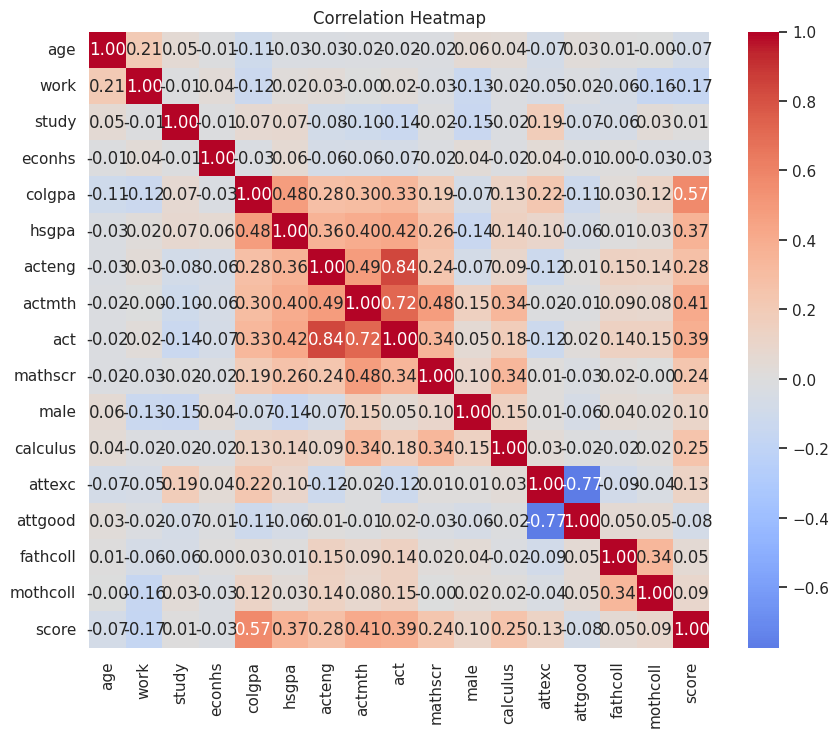

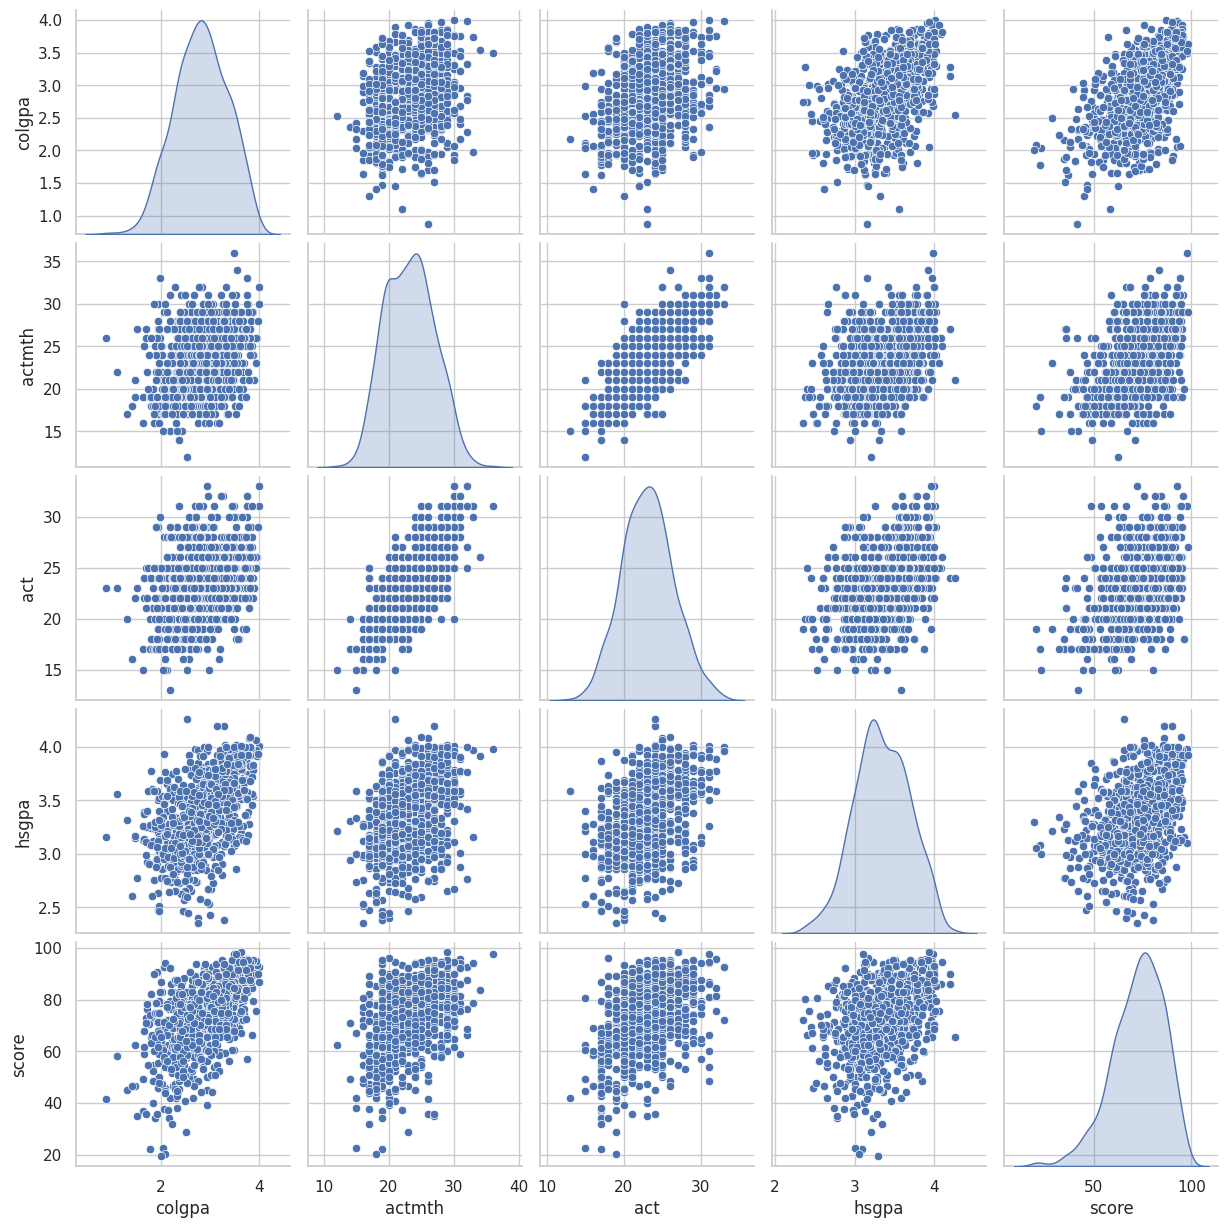

In [25]:
# Step 7: Multivariate Analysis

# Correlation Heatmap (numeric variables only)
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for top correlated features with 'score'
top_corr_features = corr[target].abs().sort_values(ascending=False)[1:5].index
sns.pairplot(df[top_corr_features.tolist() + [target]], diag_kind="kde")
plt.show()

- **Correlation Heatmap** : Shows the strength and direction of relationships between numerical variables.  
- **Pairplot** : Visualizes pairwise relationships for the top variables most correlated with `score`.

This step helps detect strong correlations, multicollinearity, and patterns involving multiple variables.